<b>Excercise 1</b>

Import Data1.csv file to python. 

Set first column as the index.

Plot all columns as time series.

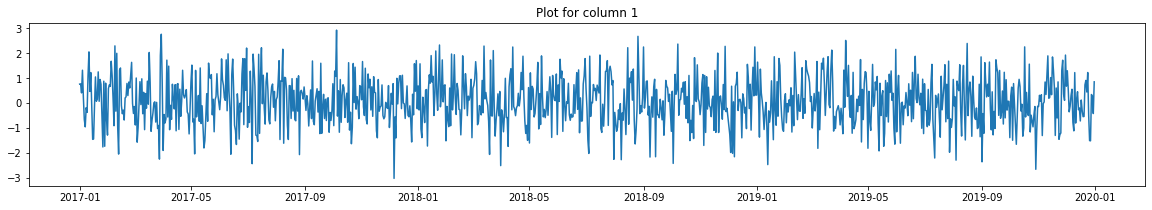

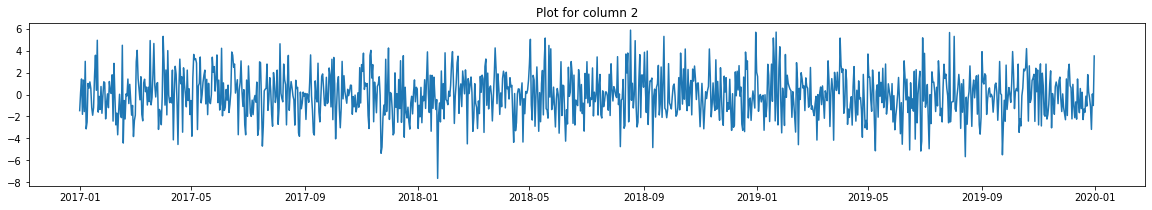

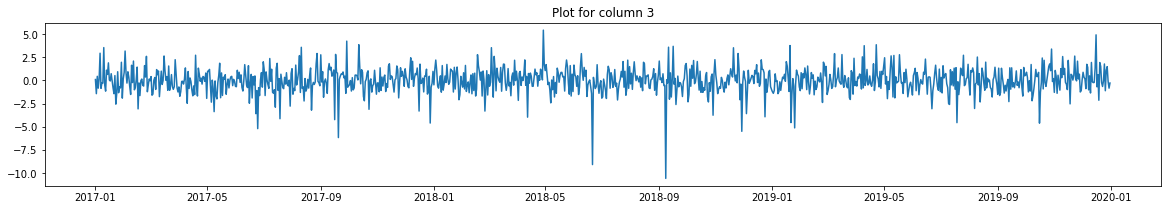

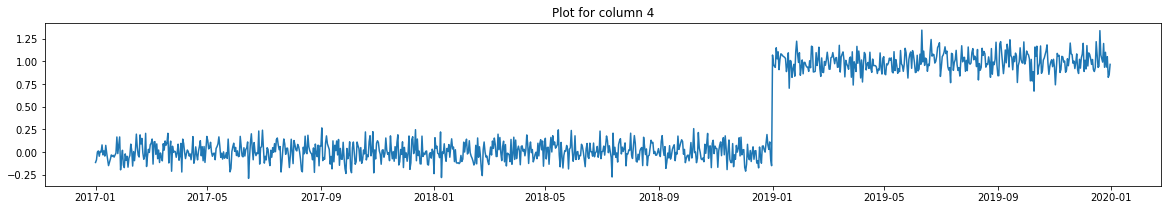

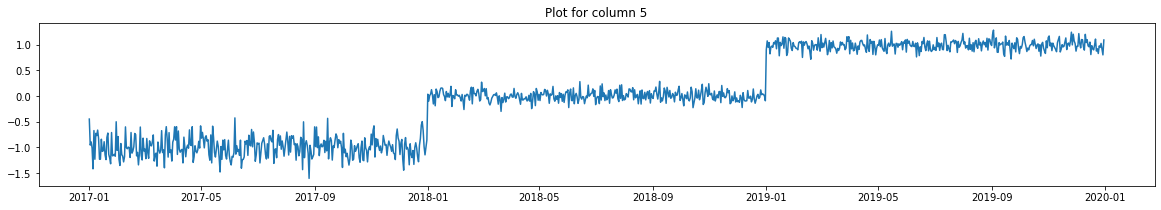

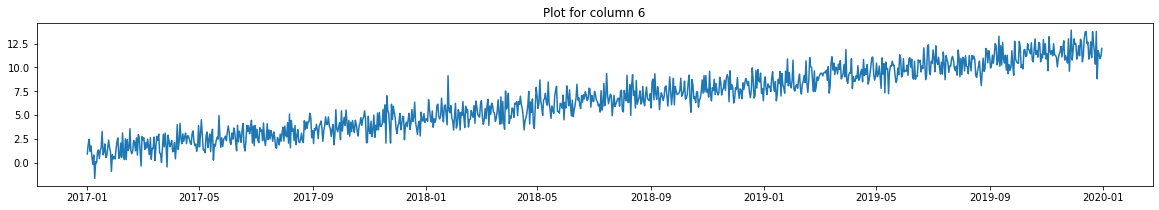

In [1]:
import os
import csv
import datetime
import matplotlib.pyplot as plt

def make_plot(x:list ,y: list, col_num: int) -> None:
    plt.rcParams["figure.figsize"] = (20,3)
    plt.title(f'Plot for column {col_num}')
    plt.plot(x, y)
    plt.show() 

with open('Data/LAB1/Data1.csv', newline='\n') as csvfile:
    csv_data = list(csv.reader(csvfile, delimiter=','))[1:]

for idx in range(1,len(csv_data[1])):
    make_plot([datetime.datetime.strptime(str(elem[0]),'%Y-%m-%d') for elem in csv_data],[float(elem[idx]) for elem in csv_data], idx)


Plot histograms of all columns, verify bin size. Plot all on a single, faceted plot.

In [2]:
import matplotlib.pyplot as plt

with open('Data/LAB1/Data1.csv', newline='\n') as csvfile:
    csv_data = list(csv.reader(csvfile, delimiter=','))[1:] 

fig, axs = plt.subplots(2, 3, sharey=True, tight_layout=True)
fig.set_size_inches(25,12)
for idx in range(1,len(csv_data[1])):
    axs[int((idx-1)/3),(idx-1)%3].hist([float(elem[idx]) for elem in csv_data], bins = 20)
    axs[int((idx-1)/3),(idx-1)%3].set_title(f'Histogram for column {idx}')

c:\Users\solar\Desktop\Studia\data_analytics\LAB1


FileNotFoundError: [Errno 2] No such file or directory: 'Data/LAB1/Data1.csv'

Plot KDE-s (Kernel Denisty Estimators) for all columns.

c:\Users\solar\Desktop\Studia\data_analytics


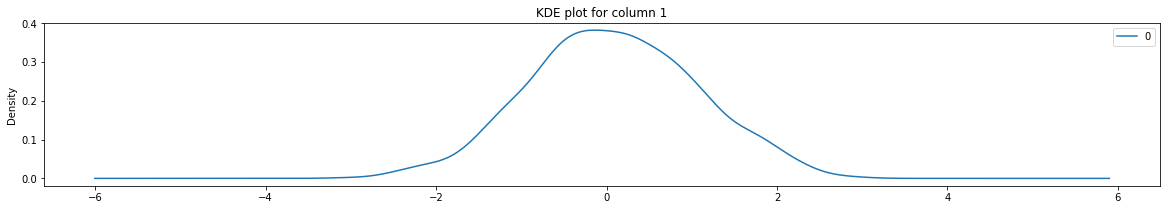

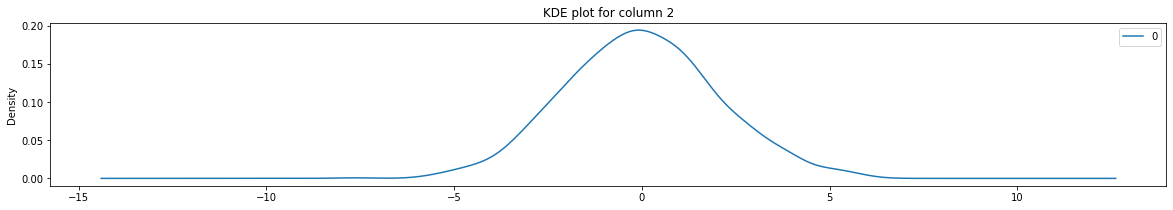

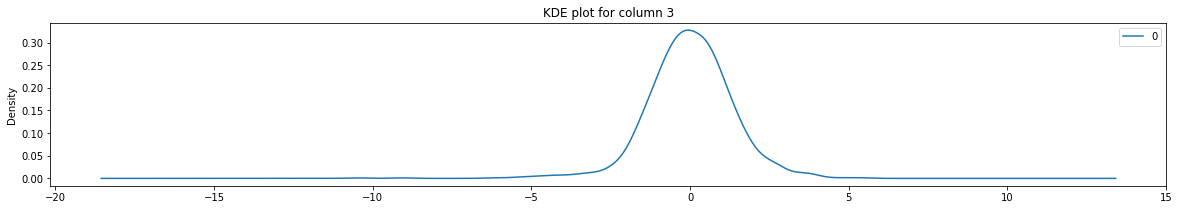

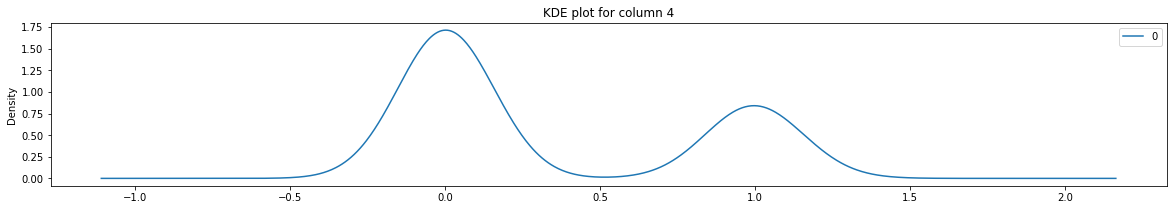

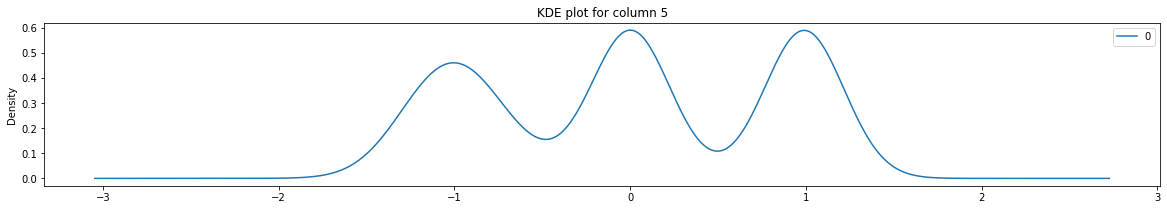

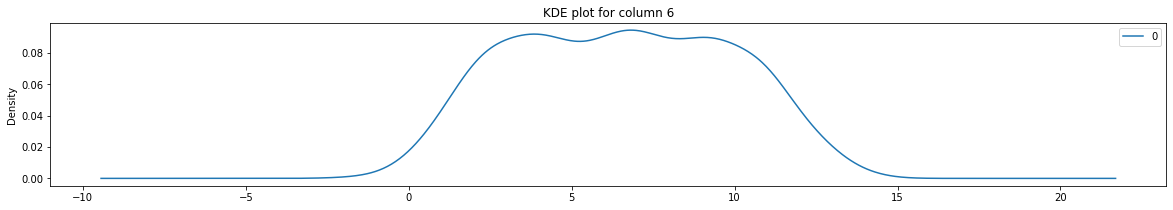

In [ ]:
import pandas as pd

with open('Data/LAB1/Data1.csv', newline='\n') as csvfile:
    csv_data = list(csv.reader(csvfile, delimiter=','))[1:]

for idx in range(1,len(csv_data[1])):
    dataFrame = pd.DataFrame(data = [float(elem[idx]) for elem in csv_data]);
    dataFrame.plot.kde(title=f"KDE plot for column {idx}")

Repeat analysis for columns $\theta_1$-$\theta_4$ in 2018.

In [ ]:
with open('Data/LAB1/Data1.csv', newline='\n') as csvfile:
    csv_data = list(csv.reader(csvfile, delimiter=','))[1:]
    
stripped_list = [elem for elem in csv_data if datetime.datetime.strptime(str(elem[0]),'%Y-%m-%d').year == 2018]
for idx in range(1,5):
    make_plot([datetime.datetime.strptime(str(elem[0]),'%Y-%m-%d') for elem in stripped_list],[float(elem[idx]) for elem in stripped_list], idx)

FileNotFoundError: [Errno 2] No such file or directory: 'Data/LAB1/Data1.csv'

In [ ]:
with open('Data/LAB1/Data1.csv', newline='\n') as csvfile:
    csv_data = list(csv.reader(csvfile, delimiter=','))[1:] 

stripped_list = [elem for elem in csv_data if datetime.datetime.strptime(str(elem[0]),'%Y-%m-%d').year == 2018]

fig, axs = plt.subplots(2, 2, sharey=True, tight_layout=True)
fig.set_size_inches(17,10)
for idx in range(1,5):
    axs[int((idx-1)/2),(idx-1)%2].hist([float(elem[idx]) for elem in stripped_list], bins = 20)
    axs[int((idx-1)/2),(idx-1)%2].set_title(f'Histogram for column {idx}')

In [ ]:
with open('Data/LAB1/Data1.csv', newline='\n') as csvfile:
    csv_data = list(csv.reader(csvfile, delimiter=','))[1:]
    
stripped_list = [elem for elem in csv_data if datetime.datetime.strptime(str(elem[0]),'%Y-%m-%d').year == 2018]

for idx in range(1,5):
    dataFrame = pd.DataFrame(data = [float(elem[idx]) for elem in stripped_list]);
    dataFrame.plot.kde(title=f"KDE plot for column {idx}")

<b>Excercise 2</b>

In [ ]:
import cmdstanpy
import random 

data = {'N': 14, 'y': random.sample([0]*5 + [1]*9, 14)}

model = cmdstanpy.CmdStanModel(stan_file='Data/LAB1/bern_1.stan')
sample = model.sample(data)
theta = sample.stan_variable('theta') 
summary = sample.summary()

plt.figure(figsize=(20,6), dpi=100)
plt.hist(theta, bins=20)
plt.axvline(summary['5%']['theta'], color='r')
plt.axvline(summary['50%']['theta'], color='m')
plt.axvline(summary['95%']['theta'], color='b')
plt.axvline(theta.mean(), color='y')
plt.show()